In [171]:
%matplotlib inline
import os
import random
import pandas_datareader.data as web
import pandas as pd
import yfinance as yf
import datetime
from datetime import date
import numpy as np
from ipywidgets import interact, fixed, IntSlider
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import seaborn as sns

from dotenv import load_dotenv
load_dotenv()
token = os.environ.get("Quandl-api")

#%load_ext datenv
#%dotenv
all_data_start = '2016-01-01'
all_data_end = '2019-10-01'
default_start, default_end = '2017-01-01', '2019-01-01'

In [37]:
print(token)

dfyKkdjEZLVphMyur76s


# Get stock data

In [38]:
aapl = web.DataReader('AAPL.US', 'quandl', '2015-01-01', '2016-01-01', api_key=token)

In [40]:
aapl.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,107.01,107.03,104.8200,105.26,40912316.0,0.0,1.0,103.387570,103.406893,101.271705,101.696810,40912316.0
2015-12-30,108.58,108.70,107.1800,107.32,25213777.0,0.0,1.0,104.904424,105.020361,103.551815,103.687076,25213777.0
2015-12-29,106.96,109.43,106.8600,108.74,30931243.0,0.0,1.0,103.339263,105.725650,103.242648,105.059007,30931243.0
2015-12-28,107.59,107.69,106.1807,106.82,26704210.0,0.0,1.0,103.947936,104.044551,102.586343,103.204002,26704210.0
2015-12-24,109.00,109.00,107.9500,108.03,13596680.0,0.0,1.0,105.310206,105.310206,104.295750,104.373042,13596680.0


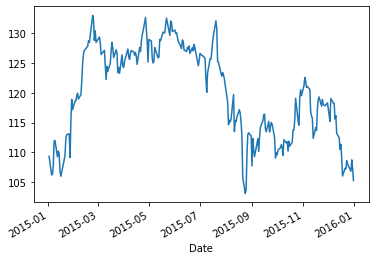

In [41]:
aapl.Close.plot()

In [42]:
v = web.DataReader('V.US', 'quandl', '2015-01-01', '2016-01-01', api_key=token)

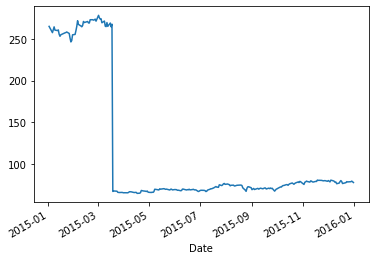

In [43]:
v.Close.plot()

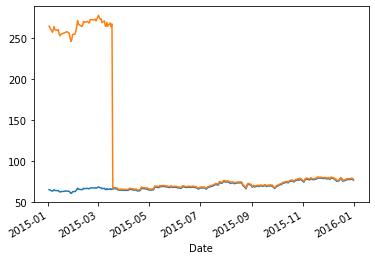

In [15]:
v.AdjClose.plot()
v.Close.plot()

In [195]:
cached_data = {}
def stock_hist(symbol, start=None, end = None):
    start=start if start else default_start
    end=end if end else default_end
    if not symbol in cached_data:
        cached_data[symbol]=web.DataReader(symbol + '.US', 'quandl', all_data_start, all_data_end, api_key=token)
        print(f"Loaded {symbol} num values = {len(cached_data[symbol])}")
        print(start, end)
    return cached_data[symbol]

In [196]:
stock_hist("AAPL", "2018-01-01", "2018-03-22")

Loaded AAPL num values = 560
2018-01-01 2018-03-22


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.150,166.92,168.340,38962839.0,0.0,1.0,173.680000,175.150000,166.920000,168.340000,38962839.0
2018-03-26,168.07,173.100,166.44,172.770,36272617.0,0.0,1.0,168.070000,173.100000,166.440000,172.770000,36272617.0
2018-03-23,168.39,169.920,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
2018-03-22,170.00,172.680,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-21,175.04,175.090,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,98.55,99.110,96.76,96.960,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
2016-01-07,98.68,100.130,96.43,96.450,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-06,100.56,102.370,99.87,100.700,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0


Loaded FB num values = 561
2017-01-01 2019-01-01
Loaded GOOG num values = 561
2017-01-01 2019-01-01


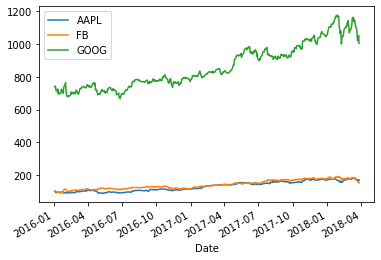

In [197]:
tickers=['AAPL', 'FB', 'GOOG']
N = len(tickers)
historical = pd.concat((stock_hist(symbol)['AdjClose'] for symbol in tickers), axis=1, keys=tickers).dropna(axis=0)
_ = historical.plot()

In [198]:
returns = (historical/historical.iloc[0]).fillna(method='backfill')
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252)

In [223]:
vols

AAPL    0.214470
TSLA    0.375588
FB      0.245711
IBM     0.188488
GOOG    0.196909
dtype: float64

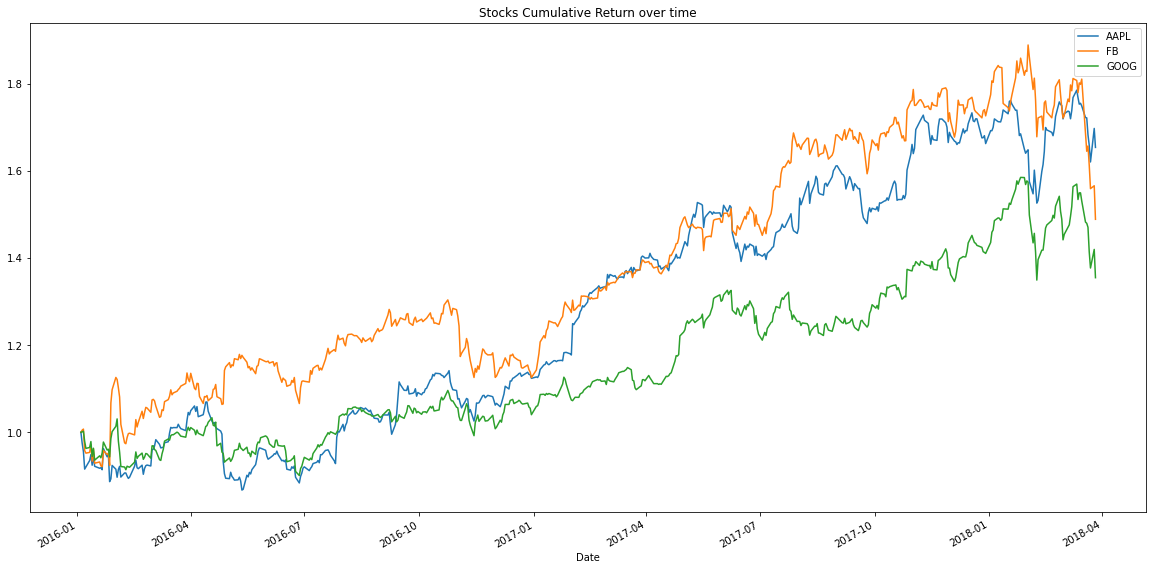

In [199]:
_ = returns.plot( figsize=(20,10),title='Stocks Cumulative Return over time')

In [202]:
returns['PORTFOLIO'] = returns.iloc[:,0:N].sum(axis=1) /N

In [224]:
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252)
vols

AAPL         0.214470
FB           0.245711
GOOG         0.196909
PORTFOLIO    0.183387
dtype: float64

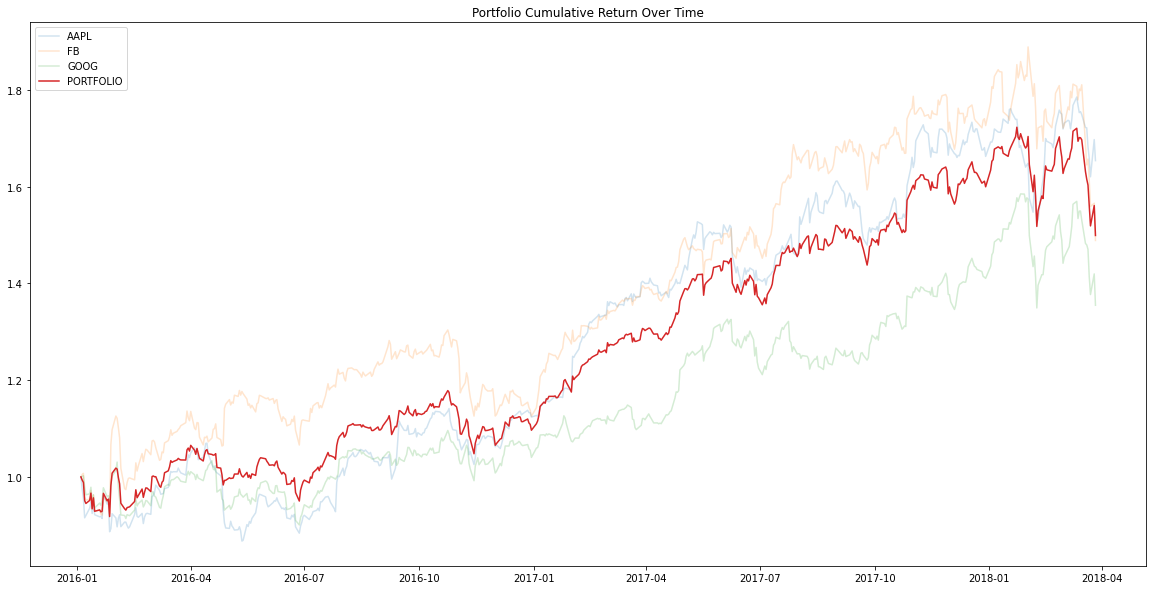

In [203]:
plt.figure(figsize=(20,10))
lines = plt.plot(returns.drop('PORTFOLIO', axis=1), alpha=0.2)
plt.title('Portfolio Cumulative Return Over Time')
plt.plot(returns['PORTFOLIO'], alpha=1)
plt.legend(returns.columns)
plt.show()

In [204]:
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252) # Annual Volatility 

tickers=['AAPL', 'TSLA', 'FB','IBM', 'GOOG']
prices = [stock_hist(symbol)['AdjClose'] for symbol in tickers]
prices = pd.concat((stock_hist(symbol)['AdjClose'] for symbol in tickers), axis=1, keys=tickers).dropna(axis=0)

Loaded TSLA num values = 561
2017-01-01 2019-01-01
Loaded IBM num values = 561
2017-01-01 2019-01-01


In [205]:
prices.head(2)

,AAPL,TSLA,FB,IBM,GOOG
Date,,,,,
2016-01-04,101.783763,223.41,102.22,126.085015,741.84
2016-01-05,99.233131,223.43,102.73,125.992271,742.58


In [206]:
def diversicheck(symbols, start_day=0, time_horizon=365, **active):
    filtered = [symbol for symbol in symbols if active.get(symbol, True)]
    prices = pd.concat((stock_hist(symbol)['AdjClose'] for symbol in filtered), axis=1, keys=filtered).dropna(axis=0)
    
    
    start_dates = prices.index[0] + datetime.timedelta(days = start_day)
    end_dates = start_dates + datetime.timedelta(days=time_horizon)
    
    prices = prices.loc[start_dates:end_dates]
    
    unit_pos = prices / prices.iloc[0,:]
    basket = unit_pos.sum(axis=1) / unit_pos.shape[1]
    unit_pos.plot(figsize=(20,10),title='Stocks Cumulative Return over time', alpha=0.3)
    basket.plot(figsize=(20,10),legend = True)
    print(f'backtest from {start_dates} to {end_dates}')

In [208]:
# cached_data ={}
prf_stocks = ['AAPL', 'TSLA', 'FB','IBM', 'GOOG']
active = dict(zip(prf_stocks, [True] * len(prf_stocks)))
_ = interact(diversicheck, symbols =fixed(prf_stocks), start_day=IntSlider(min=0,max=252*10),
             time_horizon=IntSlider(min=0,value=365,max=252*5),**active)

interactive(children=(IntSlider(value=0, description='start_day', max=2520), IntSlider(value=365, description=…

In [211]:
prf_prices = pd.concat((stock_hist(symbol)['AdjClose'] for symbol in prf_stocks), axis =1, keys=prf_stocks).dropna(axis=0)
prf_returns = (prf_prices.pct_change() + 1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()

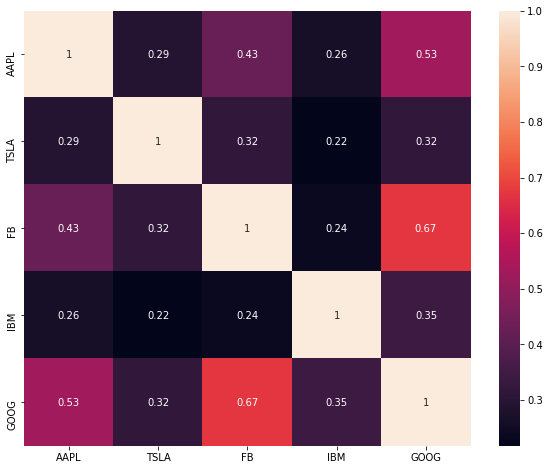

In [212]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, annot=True)

In [213]:
vols = log_returns.std() * np.sqrt(252)
avg_return = (prf_returns-1).mean()

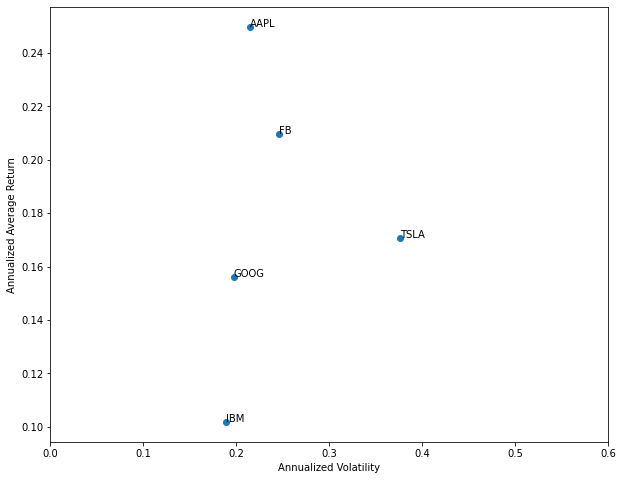

In [214]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(vols, avg_return*252)
ax.set_xlabel('Annualized Volatility')
ax.set_ylabel('Annualized Average Return')
ax.set_xlim(0,0.6)
for i, txt in enumerate(prf_stocks):
    ax.annotate(txt, xy=(vols[i], avg_return[i]*252))

In [220]:
number_of_simulations = 1000
investment_horizon = 60
simulated = pd.DataFrame([(prf_returns.iloc[random.choices(
    range(len(prf_returns)), k=investment_horizon)]).mean(axis=1).cumprod().values 
                         for x in range(number_of_simulations)]).T
simulated.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.993926,1.007795,1.010149,1.013988,1.005342,1.008159,1.006381,0.999268,0.995132,0.996961,...,1.010001,0.992585,1.010282,0.995261,1.012077,1.005494,0.994712,1.001147,1.002641,0.999637
1,0.972113,0.986591,1.006365,0.999296,0.972151,1.009673,0.995583,0.994371,0.997108,1.008694,...,1.022720,0.987220,1.017637,1.002448,1.010249,1.009652,0.989575,0.974742,1.011829,1.011376
2,0.969911,1.006062,1.015887,1.003149,0.956279,1.015164,1.005663,0.976451,0.994440,1.007733,...,1.022312,0.987327,1.030748,1.001045,1.012806,1.001476,0.992462,0.966699,0.996810,1.012467


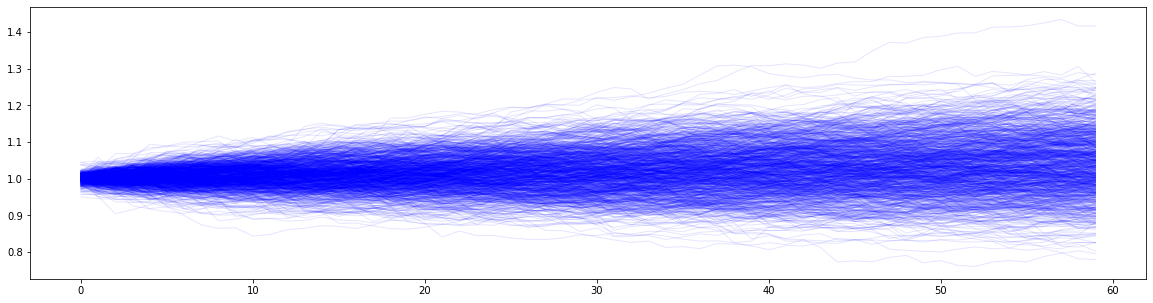

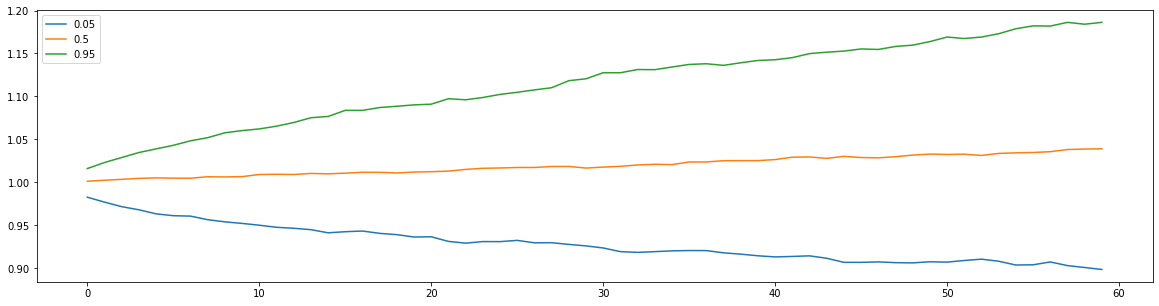

In [228]:
simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue', figsize=(20,5))
simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot(figsize=(20,5))

In [222]:
simulated.to_csv('testing1.csv', index=0) # Save Result